<br><br><center><h1 style="font-size:4em;color:#2467C0">Promo Analysis</h1></center>
<br>
<table>
    <col width="550">
    <col width="450">
    <tr>
        <td><img src="CCNLogoHorizontal.png" align="middle" style="width:550px;height:360px;"/></td>
        <td> Promo Analysis.</td>
        <td> Version 1.00</td>  
    </tr>
</table>

In [2]:
import pyodbc
%config IPCompleter.greedy=True
#%matplotlib notebook
%matplotlib inline
import datetime
import pprint
import getpass
from datetime import datetime, date, time, timedelta
from dateutil.parser import parse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib as mpl
import matplotlib.transforms as mtransforms
import matplotlib.patches as mpatch
import pylab as p
import joblib
from dateutil import relativedelta
from matplotlib.patches import FancyBboxPatch
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec
from matplotlib import cm as cm
from mpl_toolkits import mplot3d
import os
import conda
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib
from mpl_toolkits.basemap import Basemap
from numpy import array
from numpy.random import uniform, exponential
from scipy import stats
from sklearn.model_selection import train_test_split 
#from sklearn.externals import joblib
from joblib import dump, load
from branca.element import Figure
import branca.colormap as branca_folium_cm
import folium
from folium.plugins import HeatMap
import io
import math
import pickle

## Defining Plotting Style

In [2]:
#defineStyle('tableau-colorblind10')
#print(mpl.style.available)
#https://medium.com/datadriveninvestor/from-model-inception-to-deployment-adce1f5ed9d6

## Create Connection for MS SQL Server  Database and Ingest Data from this data source

Now, we will read the dataset from the sql cursor inside the file MainCursor.txt.

In [3]:
#MS SQL Server Database Connection
#https://anaconda.org/anaconda/pyodbc
#https://docs.microsoft.com/en-us/sql/connect/odbc/linux-mac/installing-the-microsoft-odbc-driver-for-sql-server?view=sql-server-ver15#ubuntu17
def MSSQLServConn():
    print("Starting MSSQLServConn...")
    try:
        dbConn = pyodbc.connect('Driver={ODBC Driver 17 for SQL Server};'
                          'Server=termserv02ccn;'
                          'Database=AnalyticsDW;'
                          'uid=analytics;'
                          'pwd=Newcode#2020;')
        return dbConn
    except Exception as exception:
        print(exception)
        return dbConn

In [4]:
dbConn = MSSQLServConn()

Starting MSSQLServConn...


<h1 style="font-size:2em;color:#000000">Defining Dataframes</h1>

In [5]:
def VW_CLIENT_CURSOR():
    try:
        cursor = dbConn.cursor()
        sqlQuery = 'SELECT * FROM [AnalyticsDW].[dbo].[VW_CLIENT]'
        pdSqlQuery = pd.read_sql_query(sqlQuery,dbConn)
        return pdSqlQuery
    except Exception as exception:
        #Empty dataframe
        pdSqlQuery = pd.DataFrame()
        print(exception)
        return pdSqlQuery

In [6]:
pdVwClientSqlQuery = VW_CLIENT_CURSOR()
print(len(pdVwClientSqlQuery))
print(type(pdVwClientSqlQuery))

55306
<class 'pandas.core.frame.DataFrame'>


In [7]:
pdVwClientSqlQuery.columns

Index(['ClientKey', 'ClientAlternateKey', 'CompanyAlternateKey', 'ClientName',
       'ClientAddress', 'ClientStatusKey', 'ClientGeoPosX', 'ClientGeoPosY',
       'ClientGeoPosZ', 'PseAlternateKey', 'NgcTpoIdAlternateKey',
       'NgcTpoTxtAlternateKey', 'RamIdAlternateKey', 'RamTxtAlternateKey',
       'CliValInvmAlternateKey', 'NeighborhoodAlternateKey',
       'NeighborhoodAlternateName', 'MunicipalityAlternateKey',
       'MunicipalityAlternateName', 'DepartmentAlternateKey',
       'DepartmentAlternateName', 'RegionAlternateKey', 'RegionAlternateName',
       'CountryAlternateKey', 'CountryAlternateName', 'CliInvMatPOP'],
      dtype='object')

In [8]:
pdVwClientSqlQuery.shape

(55306, 26)

In [9]:
#pdVwClientSqlQuery.head(5)
pdVwClientSqlQuery[:5]

,ClientKey,ClientAlternateKey,CompanyAlternateKey,ClientName,ClientAddress,ClientStatusKey,ClientGeoPosX,ClientGeoPosY,ClientGeoPosZ,PseAlternateKey,...,NeighborhoodAlternateName,MunicipalityAlternateKey,MunicipalityAlternateName,DepartmentAlternateKey,DepartmentAlternateName,RegionAlternateKey,RegionAlternateName,CountryAlternateKey,CountryAlternateName,CliInvMatPOP
0,1,134354,1,PRUEBA ALTA CLIENTE,VIENE DEL APP,1,0.000000,0.000000,0.0,VARIOS,...,BELLO AMANECER,95,MANAGUA,01,MANAGUA,1,REGION PACIFICO,NIC,NICARAGUA,7.0
1,2,134353,1,HIGUEY ANTONIO BACA,"HIELERA CELSA 1C Y 20 VRS ABAJO, LEON",1,12.424580,-86.872680,0.0,DE,...,LEON,71,LEON,08,LEON,1,REGION PACIFICO,NIC,NICARAGUA,7.0
2,4,134351,1,KAREN CECILIA TREWIN OCONOR,"DDE FUE GALLO Y VILLA 20 VRS ARRIBA, CHINANDE",1,12.622367,-87.120367,0.0,DE,...,SANTANA,45,CHINANDEGA,13,CHINANDEGA,1,REGION PACIFICO,NIC,NICARAGUA,7.0
3,6,134349,1,ARIS DEL SOCORRO MORALES LACAYO,"DE LA ENT A STA CARLOTA 1C AL NORTE, SAN JORG",1,0.000000,0.000000,0.0,DE,...,SAN JORGE (RIVAS),135,SAN JORGE,05,RIVAS,1,REGION PACIFICO,NIC,NICARAGUA,7.0
4,7,134348,1,OSCAR OSWALDO ALEMAN ESPINOZA,"CRUZ DE ESPAÑA 2C ESTE,1C NORTE 25 VRS OESTE",1,0.000000,0.000000,0.0,DE,...,BARRIO NOEL SELVA,135,SAN JORGE,05,RIVAS,1,REGION PACIFICO,NIC,NICARAGUA,7.0


In [10]:
pdVwClientSqlQuery.dtypes

ClientKey                      int64
ClientAlternateKey             int64
CompanyAlternateKey            int64
ClientName                    object
ClientAddress                 object
ClientStatusKey                int64
ClientGeoPosX                float64
ClientGeoPosY                float64
ClientGeoPosZ                float64
PseAlternateKey               object
NgcTpoIdAlternateKey           int64
NgcTpoTxtAlternateKey         object
RamIdAlternateKey              int64
RamTxtAlternateKey            object
CliValInvmAlternateKey         int64
NeighborhoodAlternateKey      object
NeighborhoodAlternateName     object
MunicipalityAlternateKey       int64
MunicipalityAlternateName     object
DepartmentAlternateKey        object
DepartmentAlternateName       object
RegionAlternateKey             int64
RegionAlternateName           object
CountryAlternateKey           object
CountryAlternateName          object
CliInvMatPOP                 float64
dtype: object

In [11]:
#pdVwClientSqlQuery.isnull()
pdVwClientSqlQuery[pdVwClientSqlQuery['CliInvMatPOP'].isnull()]

,ClientKey,ClientAlternateKey,CompanyAlternateKey,ClientName,ClientAddress,ClientStatusKey,ClientGeoPosX,ClientGeoPosY,ClientGeoPosZ,PseAlternateKey,...,NeighborhoodAlternateName,MunicipalityAlternateKey,MunicipalityAlternateName,DepartmentAlternateKey,DepartmentAlternateName,RegionAlternateKey,RegionAlternateName,CountryAlternateKey,CountryAlternateName,CliInvMatPOP
4576,8741,125454,1,UNION COMERCIAL DE NICARAGUA S.A.,FRENTE ROTONDA LA VIRGEN,1,0.000000,0.000000,0.0,DE,...,BO. SANTA ROSA,95,MANAGUA,01,MANAGUA,1,REGION PACIFICO,NIC,NICARAGUA,NaN
4778,9049,125137,1,ERIK JAVIER TELLEZ GRANADOS,RUTA AL MIRADOR CERRO EL CALVARIO,0,0.000000,0.000000,0.0,DE,...,MATAGALPA,113,MATAGALPA,03,MATAGALPA,2,REGION NORTE CENTRAL,NIC,NICARAGUA,NaN
6041,10972,123159,1,FEDERICO PIETRO BOSIO,TEATRO JUSTO RUFINO GARAY,0,12.146469,-86.290214,0.0,C,...,VILLA FONTANA,95,MANAGUA,01,MANAGUA,1,REGION PACIFICO,NIC,NICARAGUA,NaN
6046,10977,123154,1,ORLANDO JAVIER BRAVO RUIZ,ESQUINA OPUESTA PAPAJAM PIZZA-ESTELI,0,13.092605,-86.353905,0.0,C,...,ESTELI,57,ESTELI,11,ESTELI,2,REGION NORTE CENTRAL,NIC,NICARAGUA,NaN
6553,11665,122453,1,COMPAÑIA CERVECERA DE NICARAGUA SA (CLINICA),EDIFICIO CONSULTORIO MEDICO CCN,1,0.000000,0.000000,0.0,DE,...,BO. JOSE DOLORES ESTRADA,95,MANAGUA,01,MANAGUA,1,REGION PACIFICO,NIC,NICARAGUA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54627,122999,5094,1,REYNA ROSA MALDONADO RIVAS,UNAN MANAGUA,1,12.106802,-86.272636,0.0,C,...,COL. MIGUEL BONILLA,95,MANAGUA,01,MANAGUA,1,REGION PACIFICO,NIC,NICARAGUA,NaN
54720,123255,4838,1,SANDRA ISABEL GOMEZ CARVAJAL,"BO. VENEZUELA, CLINICA DON BOSCO 3C.AR. 1C.L.",0,0.000000,0.000000,0.0,VARIOS,...,BO. VENEZUELA,95,MANAGUA,01,MANAGUA,1,REGION PACIFICO,NIC,NICARAGUA,NaN
54727,123277,4815,1,COLEGIO NUEVA ESPERA NZA Y/O SALVADORA FLORES,DE LA ROLTER 7C.LAGO 1C.ABAJO,0,0.000000,0.000000,0.0,C,...,BO.PEDRO JOAQUIN CHAMORRO,95,MANAGUA,01,MANAGUA,1,REGION PACIFICO,NIC,NICARAGUA,NaN
55003,124309,3783,1,MARIA ISABEL BARRETO FLORES,"V LIBERTAD IGLE.MADRE D DIOS, 5 AND S,4AND AR",1,12.118627,-86.202382,0.0,DE,...,VILLA LIBERTAD,95,MANAGUA,01,MANAGUA,1,REGION PACIFICO,NIC,NICARAGUA,NaN


In [12]:
pdVwClientSqlQueryPSECount = pdVwClientSqlQuery[['CompanyAlternateKey','PseAlternateKey']].rename_axis('count').reset_index().groupby(["CompanyAlternateKey","PseAlternateKey"], as_index=False).count().sort_values(by=['count'],ascending=False)
pdVwClientSqlQueryPSECount
#pdVwClientSqlQueryPSECount.shape
#pdVwClientSqlQueryPSECount.columns

,CompanyAlternateKey,PseAlternateKey,count
3,1,DE,25062
1,1,C,13107
4,1,VARIOS,9975
0,1,AB,6190
2,1,C+,972


In [13]:
"""with sns.axes_style('white'):
    g = sns.catplot(x="count", y="PseAlternateKey", col="PseAlternateKey",
                data=pdVwClientSqlQueryPSECount, saturation=.5,
                kind="bar", ci=None, aspect=.6)
    g.set_xticklabels(step=5)
    plt.subplots_adjust(top=0.8)
    g.fig.suptitle('Is the DE socioeconomic stratum the most representative?')"""

'with sns.axes_style(\'white\'):\n    g = sns.catplot(x="count", y="PseAlternateKey", col="PseAlternateKey",\n                data=pdVwClientSqlQueryPSECount, saturation=.5,\n                kind="bar", ci=None, aspect=.6)\n    g.set_xticklabels(step=5)\n    plt.subplots_adjust(top=0.8)\n    g.fig.suptitle(\'Is the DE socioeconomic stratum the most representative?\')'

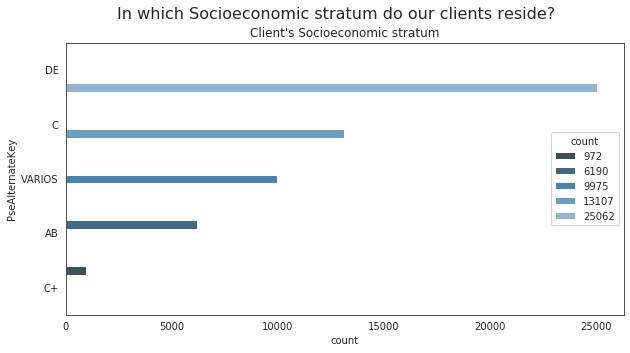

In [14]:
with sns.axes_style('white'):
    plt.figure(2, figsize=(10,5))
    the_grid = gridspec.GridSpec(1, 1)
    plt.subplot(the_grid[0, 0],  title='Client\'s Socioeconomic stratum')
    sns.barplot(x='count',y='PseAlternateKey', data=pdVwClientSqlQueryPSECount, hue="count", palette='Blues_d')
    plt.suptitle('In which Socioeconomic stratum do our clients reside?', fontsize=16)

In [15]:
#Is this Socioeconomic stratum classificatio write? Let's verify agains sales

In [16]:
#pdVwClientSqlQueryPSECmp = pdVwClientSqlQuery[['PseAlternateKey','NgcTpoIdAlternateKey','RamIdAlternateKey','CliValInvmAlternateKey','NeighborhoodAlternateKey','MunicipalityAlternateKey','DepartmentAlternateKey','RegionAlternateKey','CountryAlternateKey','CliInvMatPOP']]
pdVwClientSqlQueryPSECmp = pdVwClientSqlQuery[['PseAlternateKey','RamIdAlternateKey']]
pdVwClientSqlQueryPSECmp

,PseAlternateKey,RamIdAlternateKey
0,VARIOS,1
1,DE,1
2,DE,1
3,DE,1
4,DE,3
...,...,...
55301,VARIOS,1
55302,DE,1
55303,VARIOS,1
55304,VARIOS,1


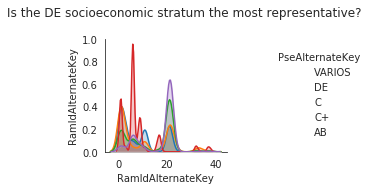

In [17]:
with sns.axes_style('white'):
    g = sns.pairplot(pdVwClientSqlQueryPSECmp, hue="PseAlternateKey")
    #g.set_xticklabels(step=5)
    plt.subplots_adjust(top=0.8)
    g.fig.suptitle('Is the DE socioeconomic stratum the most representative?')

In [18]:
pdVwClientSqlQueryLatLon = pdVwClientSqlQuery[['ClientGeoPosX','ClientGeoPosY']]
pdVwClientSqlQueryLatLon

,ClientGeoPosX,ClientGeoPosY
0,0.000000,0.000000
1,12.424580,-86.872680
2,12.622367,-87.120367
3,0.000000,0.000000
4,0.000000,0.000000
...,...,...
55301,0.000000,0.000000
55302,0.000000,0.000000
55303,0.000000,0.000000
55304,0.000000,0.000000


In [19]:
brancaFig=Figure(width=550,height=350)
m1=folium.Map(width=550,height=350,location=[12.1570081,-86.2161596],tiles='cartodbpositron',zoom_start=10,min_zoom=1,max_zoom=24)
brancaFig.add_child(m1)
folium.TileLayer('Stamen Terrain').add_to(m1)
folium.TileLayer('Stamen Toner').add_to(m1)
folium.TileLayer('Stamen Water Color').add_to(m1)
folium.TileLayer('cartodbpositron').add_to(m1)
folium.TileLayer('cartodbdark_matter').add_to(m1)
folium.LayerControl().add_to(m1)
"""for index, row in pdVwClientSqlQueryLatLon.iterrows():
    #print(row['ClientGeoPosX'], row['ClientGeoPosY'])
    folium.Marker( location=[ row['ClientGeoPosX'], row['ClientGeoPosY'] ], fill_color='#43d9de', radius=8 ).add_to( m1 )
"""
m1

In [26]:
pdVwClientSqlQueryLLNCount = pdVwClientSqlQuery[['NeighborhoodAlternateKey','MunicipalityAlternateKey','DepartmentAlternateKey','RegionAlternateKey','CountryAlternateKey']]
pdVwClientSqlQueryLLNCount = pdVwClientSqlQueryLLNCount.rename_axis('count').reset_index().groupby(['NeighborhoodAlternateKey','MunicipalityAlternateKey','DepartmentAlternateKey','RegionAlternateKey','CountryAlternateKey'], as_index=False).count().sort_values(by=['count'],ascending=False)
pdVwClientSqlQueryLLNCount

,NeighborhoodAlternateKey,MunicipalityAlternateKey,DepartmentAlternateKey,RegionAlternateKey,CountryAlternateKey,count
2417,3672,45,13,1,NIC,880
2759,3942,71,08,1,NIC,791
1905,3201,60,10,1,NIC,749
144,0104,95,01,1,NIC,727
227,0191,95,01,1,NIC,695
...,...,...,...,...,...,...
561,0616,71,08,1,NIC,1
1645,3048,135,05,1,NIC,1
2261,3498,63,10,1,NIC,1
2262,3499,63,10,1,NIC,1


In [29]:
pdVwClientSqlQueryLLNCM = pd.merge(pdVwClientSqlQuery, pdVwClientSqlQueryLLNCount,  how='inner', left_on=['NeighborhoodAlternateKey','MunicipalityAlternateKey','DepartmentAlternateKey','RegionAlternateKey','CountryAlternateKey'], right_on = ['NeighborhoodAlternateKey','MunicipalityAlternateKey','DepartmentAlternateKey','RegionAlternateKey','CountryAlternateKey'])
#new_df.shape
pdVwClientSqlQueryLLNCM.columns
pdVwClientSqlQueryLLNCM = pdVwClientSqlQueryLLNCM[['ClientGeoPosX','ClientGeoPosY','count']]
pdVwClientSqlQueryLLNCM

,ClientGeoPosX,ClientGeoPosY,count
0,0.000000,0.000000,115
1,12.145871,-86.345429,115
2,12.152623,-86.343530,115
3,12.147774,-86.343407,115
4,12.150755,-86.347538,115
...,...,...,...
55301,0.000000,0.000000,1
55302,0.000000,0.000000,1
55303,0.000000,0.000000,1
55304,0.000000,0.000000,1


In [79]:
## Define branca figure ## 
brancaFig=Figure(width=550,height=350)
## Instantiate folium base map to plot on ## 
folium_map = folium.Map(width=550,
                        height=350,
                        location=[12.1570081,-86.2161596],
                        tiles='stamentoner',
                        zoom_start=6,
                        min_zoom=1,
                        max_zoom=24,
                        attr='Mapbox')
"""
## Add BRANCA colormap ##
colormap = branca_folium_cm.linear.Blues_05.scale(0, 1)
colormap.caption = "Clients By neighborhood"
folium_map.add_child(colormap)
## Add branca child ## 
brancaFig.add_child(folium_map)
"""

# Prepare gradient dictionary according to the example like {0.4: ‘blue’, 0.65: ‘lime’, 1: ‘red’}
gradient_dict = {}
# Get the index values and colors from the just created branca-colormap
# NOTE: colors are RGBA-vectors, like "(0.9372549019607843, 0.9529411764705882, 1.0, 1.0)":
for ind_val, c in zip(colormap.index, colormap.colors):
    # Create gradient dictionary for heatmap on the fly
    gradient_dict[ind_val] = c

"""folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('Stamen Water Color').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.TileLayer('cartodbdark_matter').add_to(m)
folium.LayerControl().add_to(m)"""
HeatMap(pdVwClientSqlQueryLLNCM,
        name="LVEA",
        min_opacity=1,
        max_zoom=18,
        radius=25,
        control=True,
        #gradient=gradient_dict,  # insert gradient dict
        gradient={.4: 'blue', .65: 'lime', 1: 'red'},
        blur=18).add_to(folium_map)
folium_map

##Histogram

In [3]:
np.random.seed(1)
data = np.round(np.random.normal(5,2,100))
data

array([8., 4., 4., 3., 7., 0., 8., 3., 6., 5., 8., 1., 4., 4., 7., 3., 5.,
       3., 5., 6., 3., 7., 7., 6., 7., 4., 5., 3., 4., 6., 4., 4., 4., 3.,
       4., 5., 3., 5., 8., 6., 5., 3., 4., 8., 5., 4., 5., 9., 5., 6., 6.,
       4., 3., 4., 5., 6., 7., 7., 6., 7., 3., 8., 6., 4., 6., 5., 7., 8.,
       9., 2., 2., 4., 5., 7., 6., 1., 4., 7., 5., 7., 5., 5., 5., 6., 5.,
       5., 4., 6., 5., 7., 7., 5., 4., 4., 6., 5., 4., 5., 4., 6.])

In [5]:
print(type(data))

<class 'numpy.ndarray'>


In [6]:
data.shape

(100,)

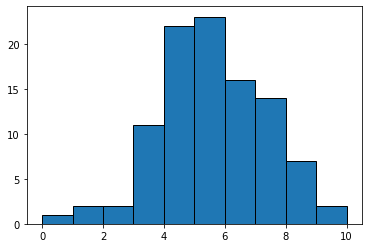

In [22]:
plt.hist(data, bins=10, range=(0,10),edgecolor="black")
plt.show()

In [9]:
mean = np.mean(data)
mean

5.1

In [11]:
median = np.median(data)
median

5.0

In [12]:
mode = stats.mode(data)
mode

ModeResult(mode=array([5.]), count=array([23]))

In [14]:
range= np.ptp(data)
range

9.0

In [15]:
variance = np.var(data)
variance

3.07

In [16]:
std = np.std(data)
std

1.752141546793523

In [17]:
df = pd.DataFrame(data=data,columns=["RandNum"])
df

,RandNum
0,8.0
1,4.0
2,4.0
3,3.0
4,7.0
...,...
95,5.0
96,4.0
97,5.0
98,4.0


In [18]:
df.describe()

,RandNum
count,100.000000
mean,5.100000
std,1.760969
min,0.000000
25%,4.000000
50%,5.000000
75%,6.000000
max,9.000000


In [19]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RandNum,100.0,5.1,1.760969,0.0,4.0,5.0,6.0,9.0
